C:\Users\devas\AppData\Local\Temp\ipykernel_23284\2424357995.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


Epoch 1/5


C:\Users\devas\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 311s 609ms/step - accuracy: 0.5003 - loss: 0.7058 - val_accuracy: 0.5518 - val_loss: 0.6817
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 287s 539ms/step - accuracy: 0.6142 - loss: 0.6394 - val_accuracy: 0.8058 - val_loss: 0.4595
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 338s 570ms/step - accuracy: 0.8237 - loss: 0.4081 - val_accuracy: 0.8474 - val_loss: 0.3525
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 304s 534ms/step - accuracy: 0.8464 - loss: 0.3751 - val_accuracy: 0.7929 - val_loss: 0.4623
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 277s 554ms/step - accuracy: 0.8488 - loss: 0.3626 - val_accuracy: 0.8649 - val_loss: 0.3352


Model saved as 'combined_lstm_rnn_model.h5'


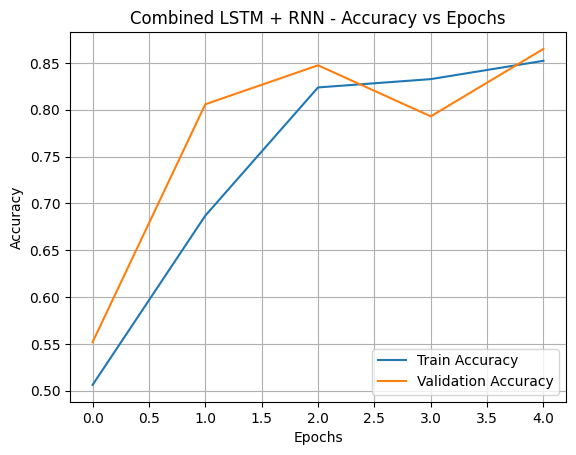

313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step


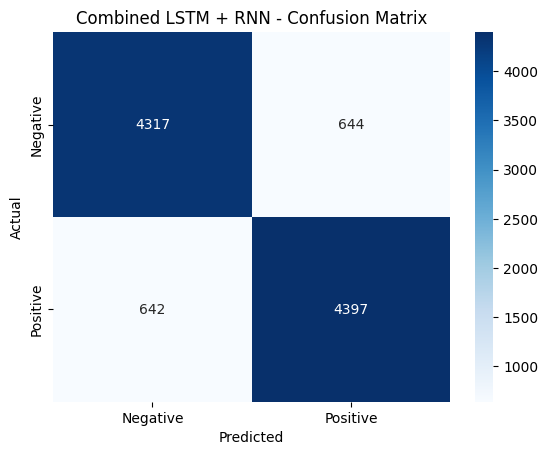

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.8638 - loss: 0.3263

Combined LSTM + RNN Accuracy: 0.8714


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense

data = pd.read_csv("IMDB Dataset.csv")
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

combined_model = Sequential()
combined_model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
combined_model.add(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
combined_model.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2))
combined_model.add(Dense(1, activation='sigmoid'))

combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

combined_history = combined_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

combined_model.save("combined_lstm_rnn_model.h5")
print("Model saved as 'combined_lstm_rnn_model.h5'")

def plot_training_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(combined_history, "Combined LSTM + RNN")

def plot_confusion_matrix(true, pred, title):
    cm = confusion_matrix(true, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(Y_test, combined_model.predict(X_test).round(), "Combined LSTM + RNN")

combined_loss, combined_acc = combined_model.evaluate(X_test, Y_test)
print(f"\nCombined LSTM + RNN Accuracy: {combined_acc:.4f}")
